In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2017-04-07_112617_r1h11a.npd/')

In [4]:
npd.node_names()

['StreamArray0', 'ADCSnap1']

In [5]:
sa = npd.StreamArray0
snap = npd.ADCSnap1

In [18]:
(snap.x.ptp(), snap.y.ptp())

(2794.0, 2725.0)

In [19]:
(snap.x.std(), snap.y.std())

(547.83537901689454, 544.14186254246965)

In [7]:
all_ss = [sa[channel] for channel in range(sa.tone_index.size)]

In [10]:
for ss in all_ss:
    ss.S_twosided, ss.f_twosided = plt.mlab.psd(ss.s21_raw, Fs=ss.stream_sample_rate,
                                                NFFT=ss.s21_raw.size // 2**3, noverlap=ss.s21_raw.size // 2**4,
                                                window=plt.mlab.window_hanning, detrend=plt.mlab.detrend_none,
                                                sides='twosided')

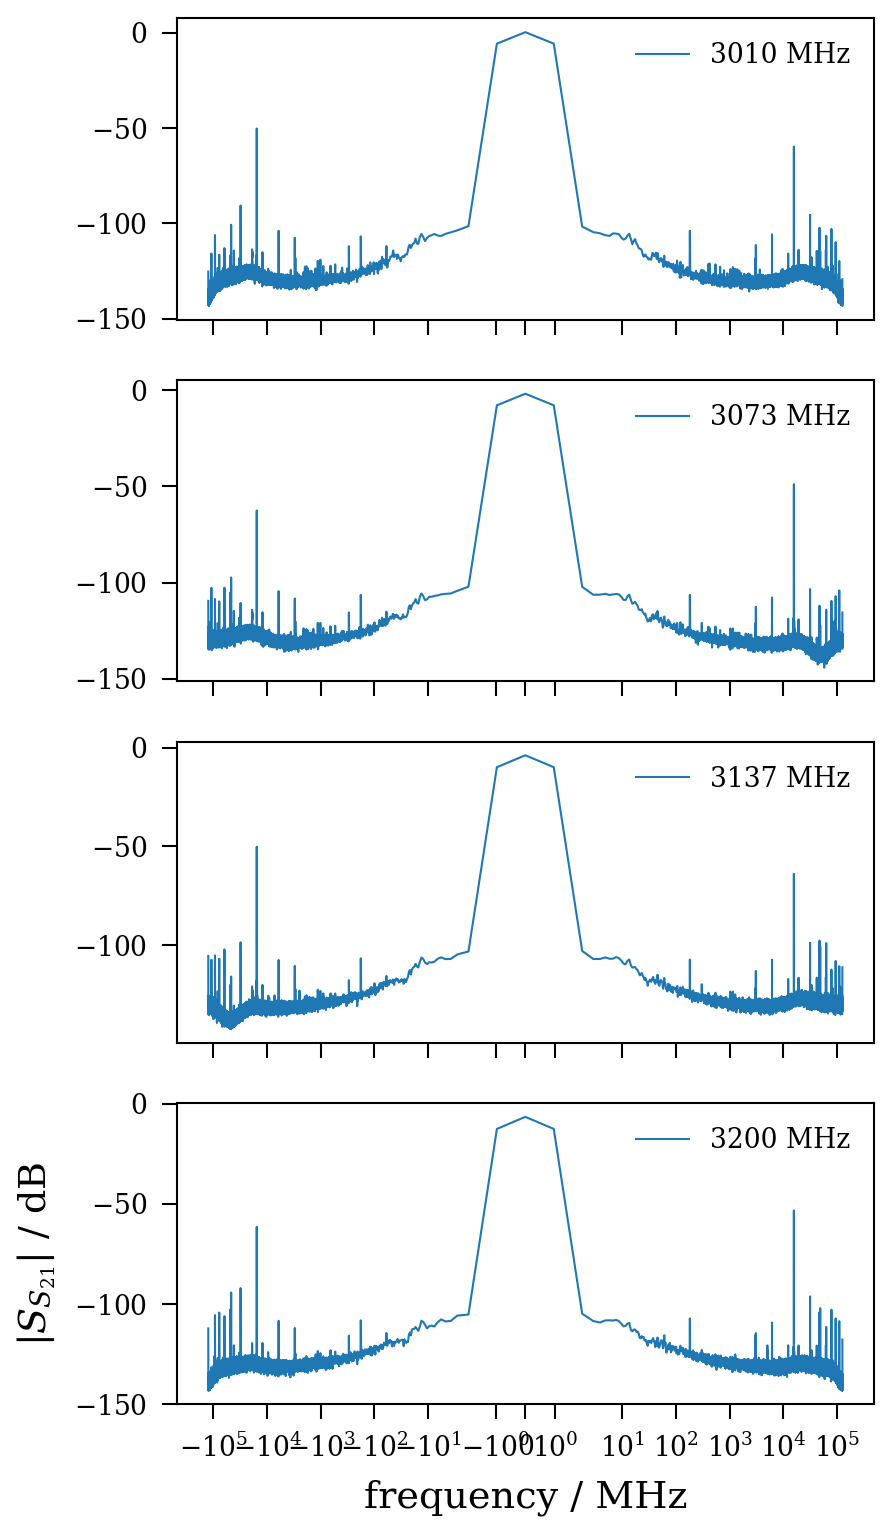

In [15]:
fig, axes = plt.subplots(sa.tone_index.size, 1, sharex=True, figsize=(3, 6))
for ax, ss in zip(axes.flatten(), all_ss):
    ax.set_xscale('symlog')
    ax.plot(ss.f_twosided, 10 * np.log10(np.abs(ss.S_twosided)), label="{:.0f} MHz".format(ss.frequency_MHz))
    ax.legend(fontsize='xx-small')
    ax.tick_params(labelsize='xx-small')
axes[-1].set_xlabel('frequency / MHz')
axes[-1].set_ylabel(r'$|S_{S_{21}}|$ / dB')